In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import math
from sklearn.cluster import AgglomerativeClustering
%matplotlib inline

In [4]:
iris = load_iris()
iris_data = iris.data
iris_data_pd = pd.DataFrame(iris_data, columns = iris.feature_names)
iris_data_pd

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


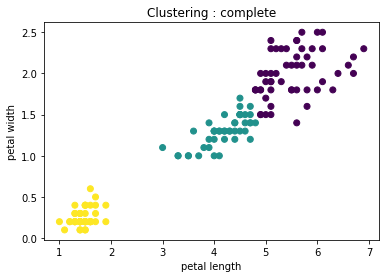

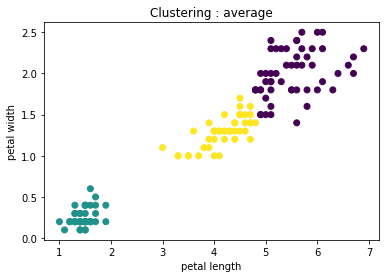

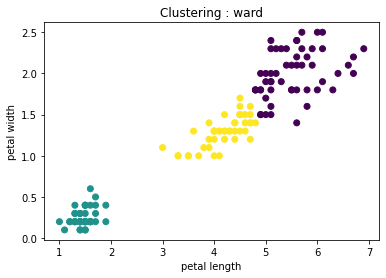

In [14]:
linkage = ['complete', 'average', 'ward'] # single은 nearest로 complete은 fur로 계산한 값으로 이해.
for idx, i in enumerate(linkage):
    plt.figure(idx)
    hier = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = i)
    hier.fit(iris_data_pd.iloc[:, 2:4])
    plt.scatter(iris_data_pd.iloc[:, 2], iris_data_pd.iloc[:, 3], c = hier.labels_ )
    plt.title('Clustering : '+i)
    plt.xlabel('petal length')
    plt.ylabel('petal width')
plt.show()

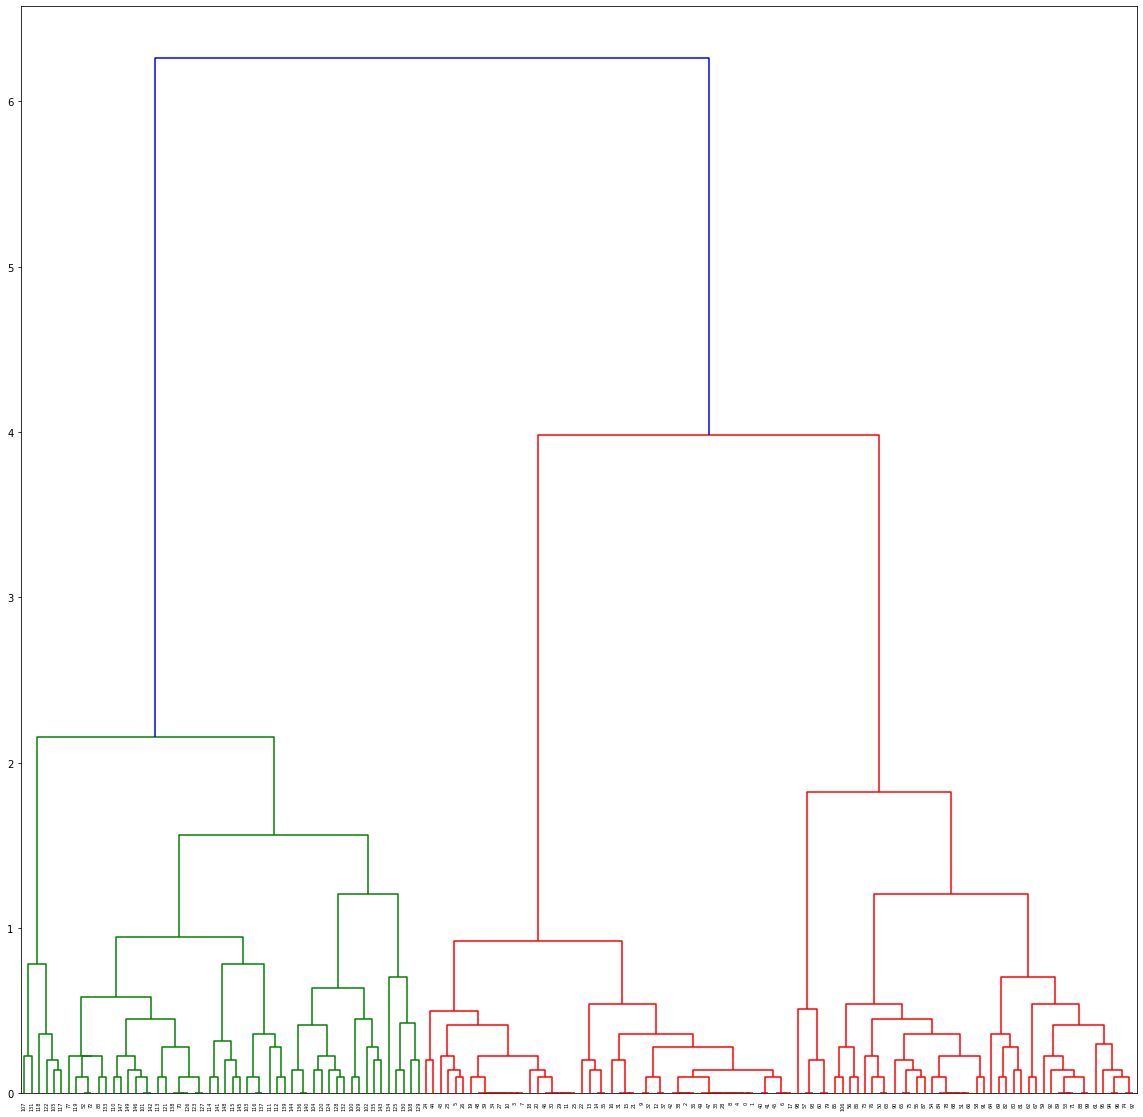

In [16]:
from scipy.cluster import hierarchy
hierar = hierarchy.linkage(iris_data_pd.iloc[:, 2:4], 'complete')
plt.figure(figsize = (20, 20))
dn = hierarchy.dendrogram(hierar)

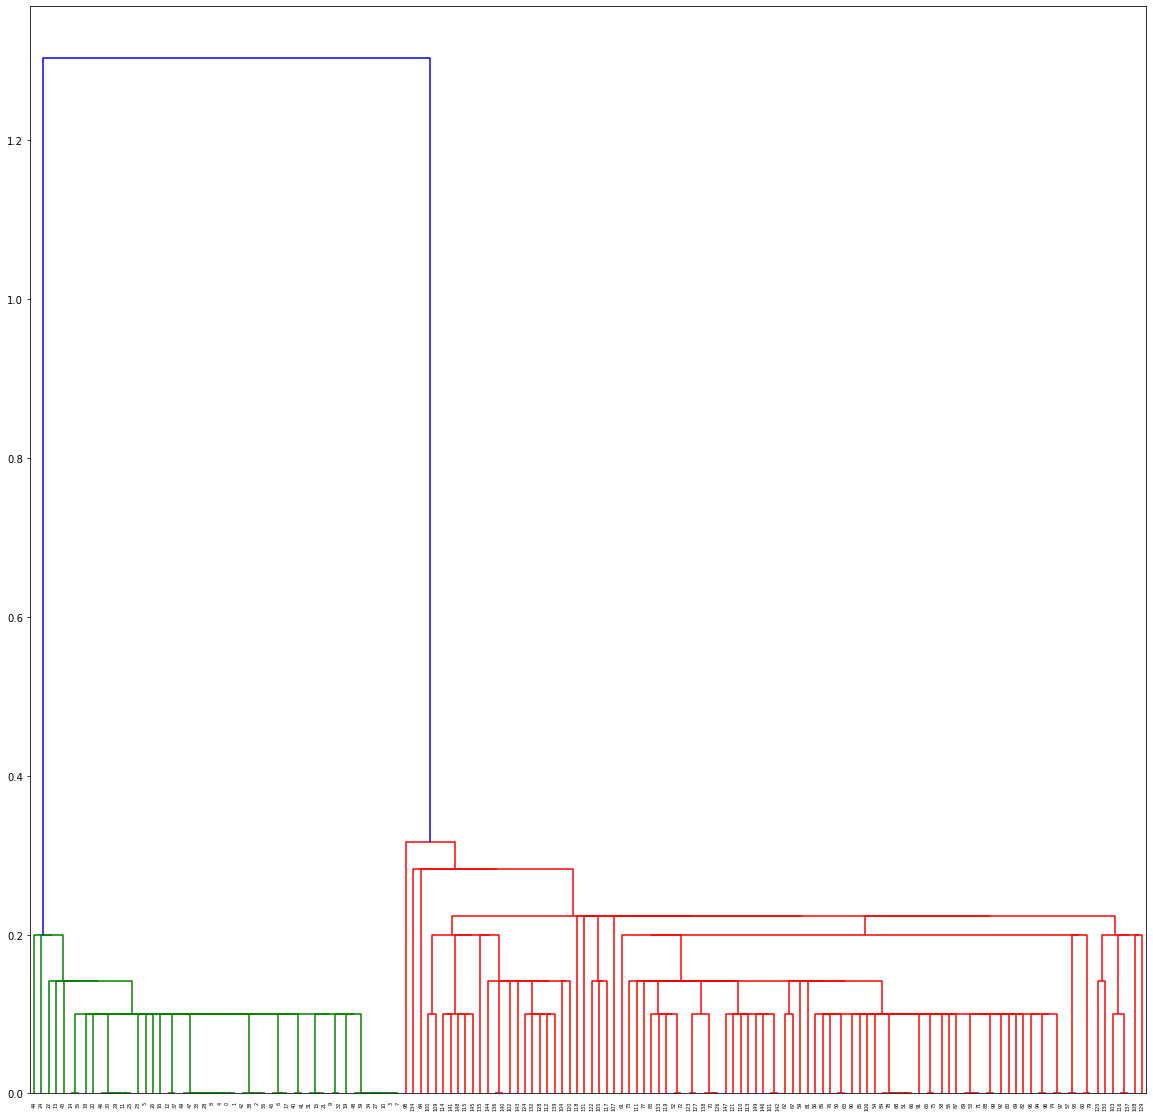

In [17]:
hierar = hierarchy.linkage(iris_data_pd.iloc[:, 2:4], 'single')
plt.figure(figsize = (20, 20))
dn = hierarchy.dendrogram(hierar)

In [21]:
data = pd.read_csv('C:\\Workspace\\python\\Data_Science\\dataA\\분반(A반)\\Wholesale customers data.csv')
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [22]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data) # 데이터 값 스케일링 
data_scaled = pd.DataFrame(data_scaled, columns = data.columns)
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


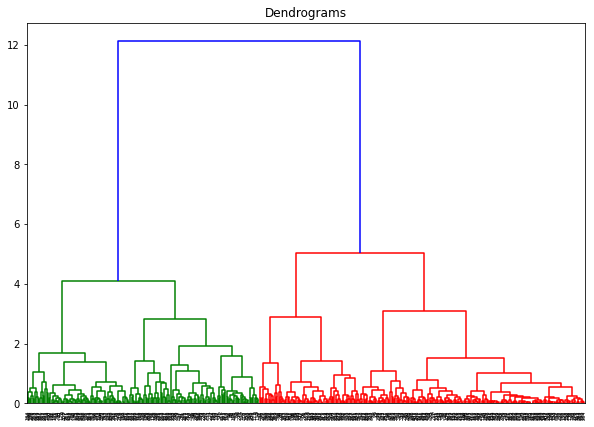

In [23]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize = (10, 7))
plt.title('Dendrograms')
dend = shc.dendrogram(shc.linkage(data_scaled.iloc[:, 2:], method = 'ward'))

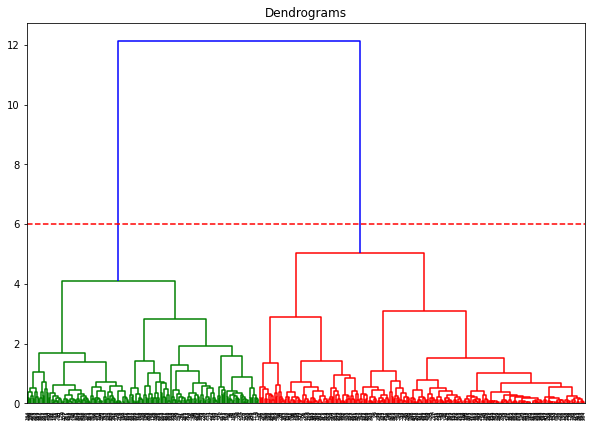

In [27]:
plt.figure(figsize = (10, 7))
plt.title('Dendrograms')
dend = shc.dendrogram(shc.linkage(data_scaled.iloc[:, 2:], method = 'ward'))
plt.axhline(y = 6, color = 'r', linestyle = '--')

In [28]:
from sklearn.cluster import AgglomerativeClustering

clusters = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
clusters.fit_predict(data_scaled.iloc[:, 2:])

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

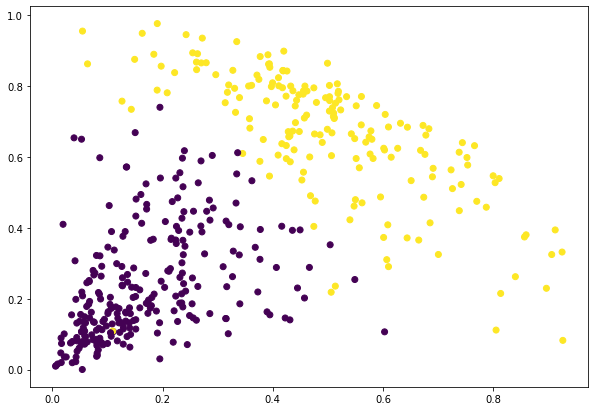

In [29]:
plt.figure(figsize = (10, 7))
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c = clusters.labels_)

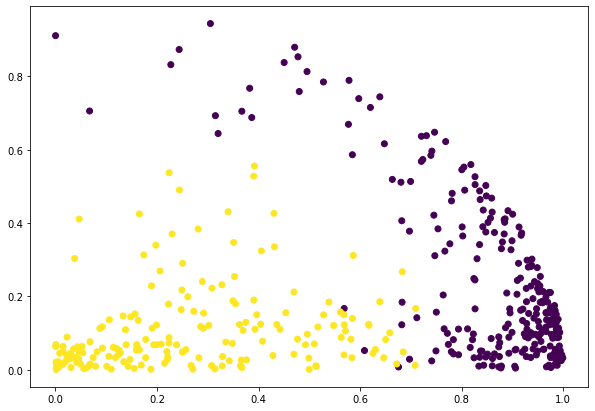

In [30]:
plt.figure(figsize = (10, 7))
plt.scatter(data_scaled['Fresh'], data_scaled['Frozen'], c = clusters.labels_)